In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from wordcloud import WordCloud

In [2]:
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
df = pd.read_json('MyData/StreamingHistory0.json') 

In [4]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2020-09-15 16:00,Ariana Grande,7 rings,177191
1,2020-09-27 16:40,Clean Bandit,Symphony (feat. Zara Larsson),212459
2,2020-09-27 16:41,Clean Bandit,I Miss You (feat. Julia Michaels),29563
3,2020-09-27 16:44,Major Lazer,Lean On,171058
4,2020-09-27 16:46,Lord Huron,The Night We Met,150003


# Data Cleaning
The data is very clean, but we still need to pre-process a little bit, to get more information.

In [5]:
df['Play-Time'] = pd.to_datetime(df['endTime'])

In [6]:
df['year'] = pd.DatetimeIndex(df["Play-Time"]).year
df['month'] = pd.DatetimeIndex(df["Play-Time"]).month
df['day'] = pd.DatetimeIndex(df["Play-Time"]).day
df['weekday'] = pd.DatetimeIndex(df["Play-Time"]).weekday
df['time'] = pd.DatetimeIndex(df["Play-Time"]).time
df['hours'] = pd.DatetimeIndex(df["Play-Time"]).hour
df['day-name'] = df["Play-Time"].apply(lambda x: x.day_name())
df['Count'] = 1 

In [7]:
df['Time-Played (hh-mm-ss)'] = pd.to_timedelta(df['msPlayed'], unit = 'ms')

In [8]:
def hours(td):
    return td.seconds/3600

def minutes(td):
    return (td.seconds/60)%60

df['Listening Time(Hours)'] = df['Time-Played (hh-mm-ss)'].apply(hours).round(3)
df['Listening Time(Minutes)'] = df['Time-Played (hh-mm-ss)'].apply(minutes).round(3)

In [9]:
df.drop(columns=['endTime', 'Time-Played (hh-mm-ss)', 'msPlayed'], inplace = True)
df.head()

,artistName,trackName,Play-Time,year,month,day,weekday,time,hours,day-name,Count,Listening Time(Hours),Listening Time(Minutes)
0,Ariana Grande,7 rings,2020-09-15 16:00:00,2020,9,15,1,16:00:00,16,Tuesday,1,0.049,2.950
1,Clean Bandit,Symphony (feat. Zara Larsson),2020-09-27 16:40:00,2020,9,27,6,16:40:00,16,Sunday,1,0.059,3.533
2,Clean Bandit,I Miss You (feat. Julia Michaels),2020-09-27 16:41:00,2020,9,27,6,16:41:00,16,Sunday,1,0.008,0.483
3,Major Lazer,Lean On,2020-09-27 16:44:00,2020,9,27,6,16:44:00,16,Sunday,1,0.048,2.850
4,Lord Huron,The Night We Met,2020-09-27 16:46:00,2020,9,27,6,16:46:00,16,Sunday,1,0.042,2.500


# Answering Questions

#### 1. How many unique artist did I have?

In [10]:
unique_artists = df['artistName'].nunique()
total_artists = df['artistName'].count()

In [11]:
unique_artist_percentage = unique_artists / total_artists * 100

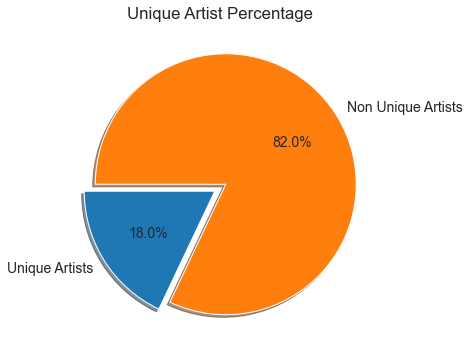

In [12]:
unique_artist_list = np.array([unique_artists, total_artists-unique_artists])
unique_artist_list_labels = ['Unique Artists', 'Non Unique Artists']

fig, ax = plt.subplots(figsize = (12,6))
ax.pie(unique_artist_list, labels = unique_artist_list_labels, autopct='%1.1f%%', explode = [0.05, 0.05] , startangle = 180, shadow = True);
plt.title('Unique Artist Percentage');

#### 2. Who are my favorite artists?

In [42]:
top_10_artist_time_df = df.groupby(['artistName'])[['Listening Time(Hours)', 'Listening Time(Minutes)', 'Count']].sum().sort_values(by = 'Listening Time(Minutes)', ascending = False)
top_10_artist_time_df = top_10_artist_time_df.head(20)
top_10_artist_time_df.reset_index(level = 0, inplace = True)
top_10_artist_time_df

,artistName,Listening Time(Hours),Listening Time(Minutes),Count
0,Taylor Swift,3.487,209.306,191
1,Shakira,1.168,70.150,20
2,The Shins,0.731,43.801,14
3,Clean Bandit,0.631,37.732,18
4,A.R. Rahman,0.496,29.784,6
5,Ariana Grande,0.478,28.784,15
6,Selena Gomez,0.475,28.351,15
7,Nada Surf,0.427,25.585,7
8,Kenny Rogers,0.390,23.400,8
9,DIVINE,0.383,22.968,10


In [46]:
fig = px.bar(top_10_artist_time_df,
             x = 'artistName',
             y = 'Listening Time(Hours)',
             color = 'Listening Time(Hours)',
             labels = {'artistName' : 'Artist Name',
                      'Listening Time(Hours)' : 'Number of hours spent'}, height = 600, width = 800,
             title = 'My Top 20 Favorite Artist')
fig.show()

It's not my fault, Taylor Swift keeps dropping blockbuster albums.

Now let's check top 10 artist based on number of songs played.

In [47]:
top_10_artist_count_df = df.groupby(['artistName'])[['Listening Time(Hours)','Listening Time(Minutes)','Count']].sum().sort_values(by='Count',ascending=False)
top_10_artist_count_df = top_10_artist_count_df.head(20)
top_10_artist_count_df.reset_index(level = 0, inplace = True)
top_10_artist_count_df

,artistName,Listening Time(Hours),Listening Time(Minutes),Count
0,Taylor Swift,3.487,209.306,191
1,Shakira,1.168,70.150,20
2,Clean Bandit,0.631,37.732,18
3,Ariana Grande,0.478,28.784,15
4,Selena Gomez,0.475,28.351,15
5,The Shins,0.731,43.801,14
6,American Authors,0.200,11.949,12
7,Manu Pilas,0.365,21.768,12
8,Fort Atlantic,0.295,17.617,11
9,DIVINE,0.383,22.968,10


In [50]:
fig = px.bar(top_10_artist_count_df,
             x = 'artistName',
             y = 'Count',
             color = 'Count',
             labels = {'artistName' : 'Artist Name',
                      'Count' : 'Number of times the song played'}, height = 600, width = 800,
             title = 'My Top 10 Favourite Artist (based on number of songs played)')
fig.show()

Ok, let's quickly visualize my top 10 artist by hours and by counts

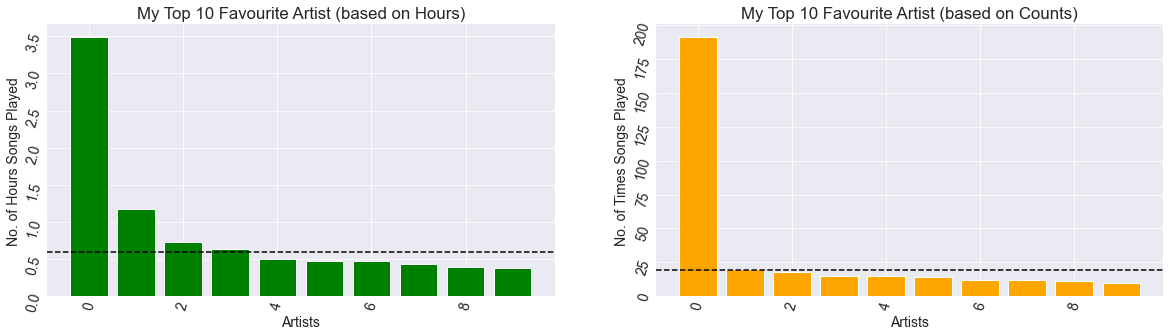

In [51]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (20, 5))

ax1.bar(top_10_artist_time_df.head(10).index,top_10_artist_time_df['Listening Time(Hours)'].head(10), color = 'green')
ax1.set(title = 'My Top 10 Favourite Artist (based on Hours)', xlabel='Artists', ylabel = 'No. of Hours Songs Played');
ax1.tick_params(labelrotation = 75);
ax1.axhline(top_10_artist_time_df['Listening Time(Hours)'][:100].mean(), linestyle = '--', color = 'black')

ax2.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df['Count'].head(10), color = 'orange')
ax2.set(title = 'My Top 10 Favourite Artist (based on Counts)', xlabel = 'Artists',ylabel = 'No. of Times Songs Played');
ax2.tick_params(labelrotation = 75);
ax2.axhline(top_10_artist_count_df['Count'][:100].mean(), linestyle = '--', color = 'black');

#### 3. What are my favorites songs?

In [23]:
top_10_songs_time_df = df.groupby(['trackName'])[['Listening Time(Hours)','Listening Time(Minutes)','Count']].sum().sort_values(by = 'Listening Time(Minutes)', ascending = False)
top_10_songs_count_df = df.groupby(['trackName'])[['Listening Time(Hours)','Listening Time(Minutes)','Count']].sum().sort_values(by = 'Count', ascending = False)

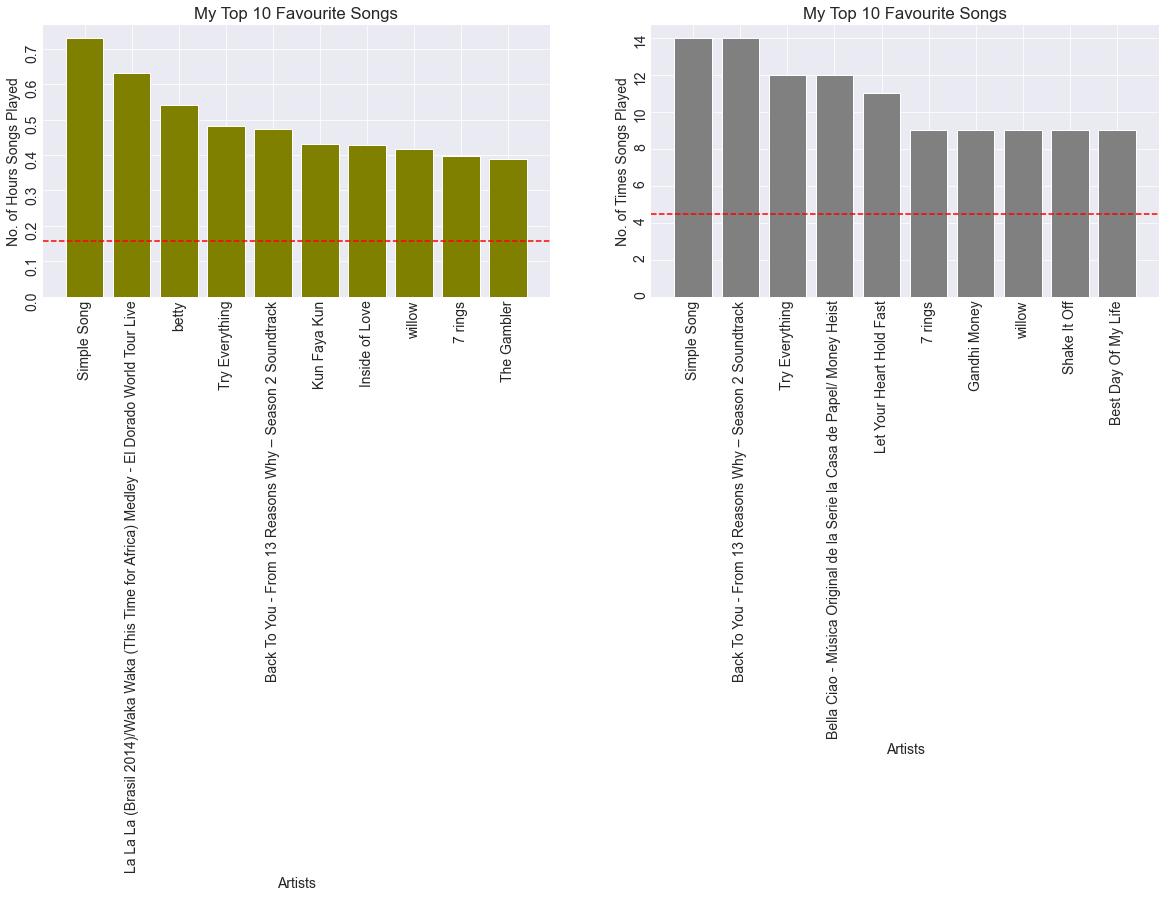

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))

ax1.bar(top_10_songs_time_df.head(10).index, top_10_songs_time_df['Listening Time(Hours)'].head(10),  color = 'olive')
ax1.set(title = 'My Top 10 Favourite Songs', xlabel = 'Artists', ylabel = 'No. of Hours Songs Played');
ax1.tick_params(labelrotation = 90);
ax1.axhline(top_10_songs_time_df['Listening Time(Hours)'][:100].mean(),  linestyle = '--',  color = 'r')

ax2.bar(top_10_songs_count_df.head(10).index, top_10_songs_count_df['Count'].head(10),  color = 'gray')
ax2.set(title = 'My Top 10 Favourite Songs', xlabel = 'Artists', ylabel = 'No. of Times Songs Played');
ax2.tick_params(labelrotation = 90);
ax2.axhline(top_10_songs_count_df['Count'][:100].mean(),  linestyle = '--',  color = 'r');

#### 4. How much time I spend on Spotify?

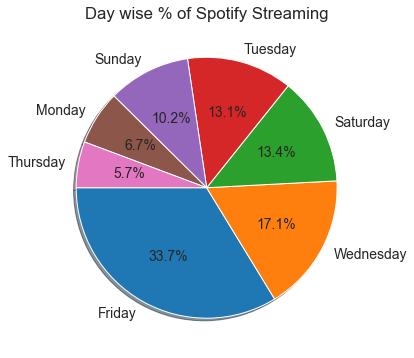

In [28]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.pie(df['day-name'].value_counts(), labels = df['day-name'].value_counts().index, autopct = '%1.1f%%', startangle = 180, shadow = True);
ax.set(title = 'Day wise % of Spotify Streaming');

Friday's the day!

#### 5. What's my average hourly usage of Spotify

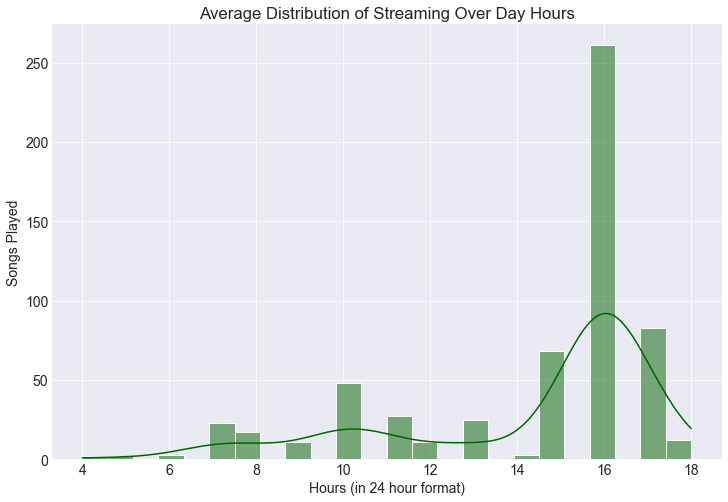

In [29]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(title = 'Average Distribution of Streaming Over Day Hours', xlabel = 'Hours (in 24 hour format)', ylabel = 'Songs Played')
sns.histplot(df['hours'], bins = 24, kde = True, color = 'darkgreen');

Evening and Night

#### 6. How much time did I spend on Spotify each month?

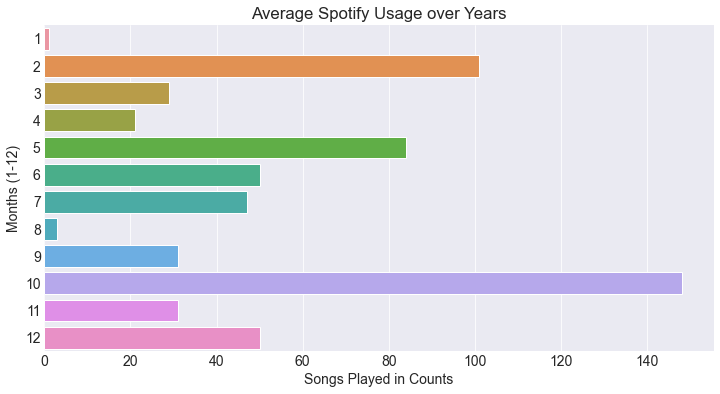

In [30]:
fig, ax = plt.subplots(figsize = (12, 6))

ax = sns.countplot(y = df['month'], ax = ax)
ax.set(title = 'Average Spotify Usage over Years', xlabel = 'Songs Played in Counts', ylabel = 'Months (1-12)');

#### 7. On which day I played maximum number of songs?

In [31]:
df['date'] = df['Play-Time'].dt.date
most_songs = df.groupby(['date'])[['Count']].sum().sort_values(by = 'Count', ascending = False)

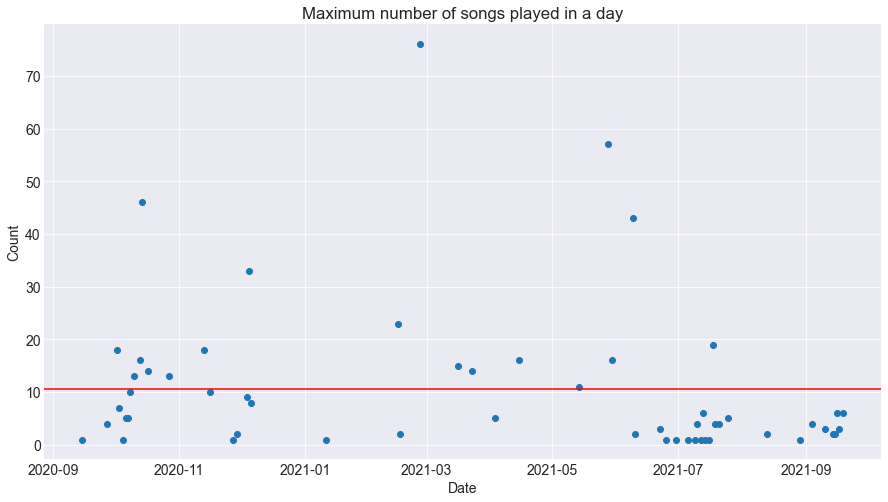

In [32]:
fig, ax = plt.subplots(figsize = (15, 8))

ax.scatter(most_songs.index, most_songs['Count']);
ax.set(title = 'Maximum number of songs played in a day', xlabel = 'Date', ylabel = 'Count');
ax.axhline(most_songs['Count'].mean(), linestyle = '-', color = 'r');

#### 8. Who are my favorite artists?

In [33]:
fav_artist = df.groupby(['artistName'])['Count'].count()

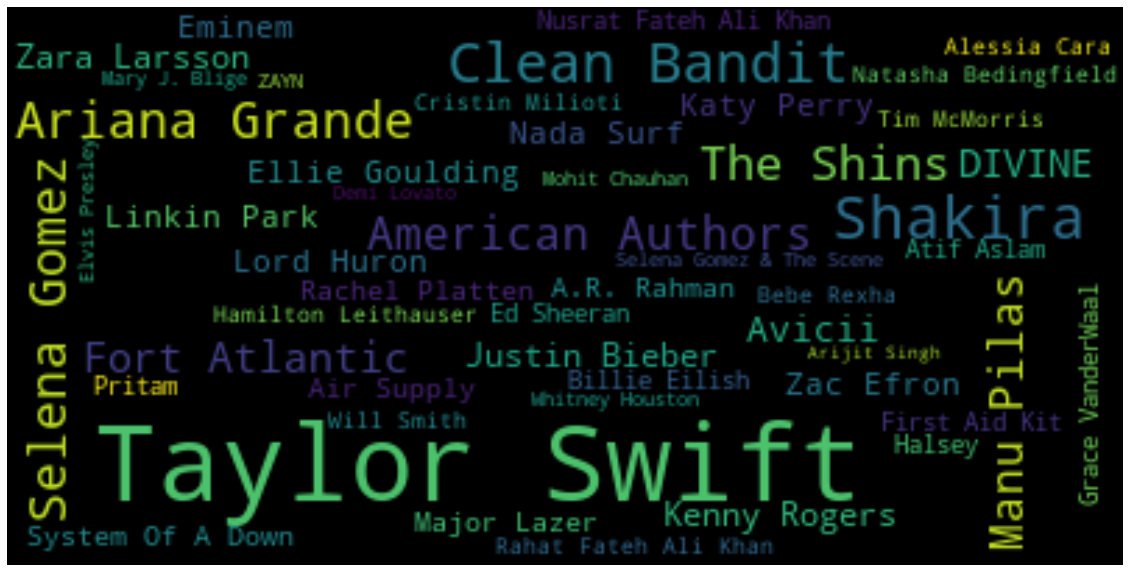

In [42]:
fig, ax = plt.subplots(figsize = (20, 15))

wordcloud = WordCloud(width = 400, height = 200, max_words = 50, relative_scaling = 0.5, normalize_plurals = False).generate_from_frequencies(fav_artist)
ax.imshow(wordcloud, interpolation = 'bilinear')
plt.axis(False);

#### 9. What are my top 50 favorites songs?

In [41]:
fav_songs = df.groupby(['trackName'])['Count'].count()

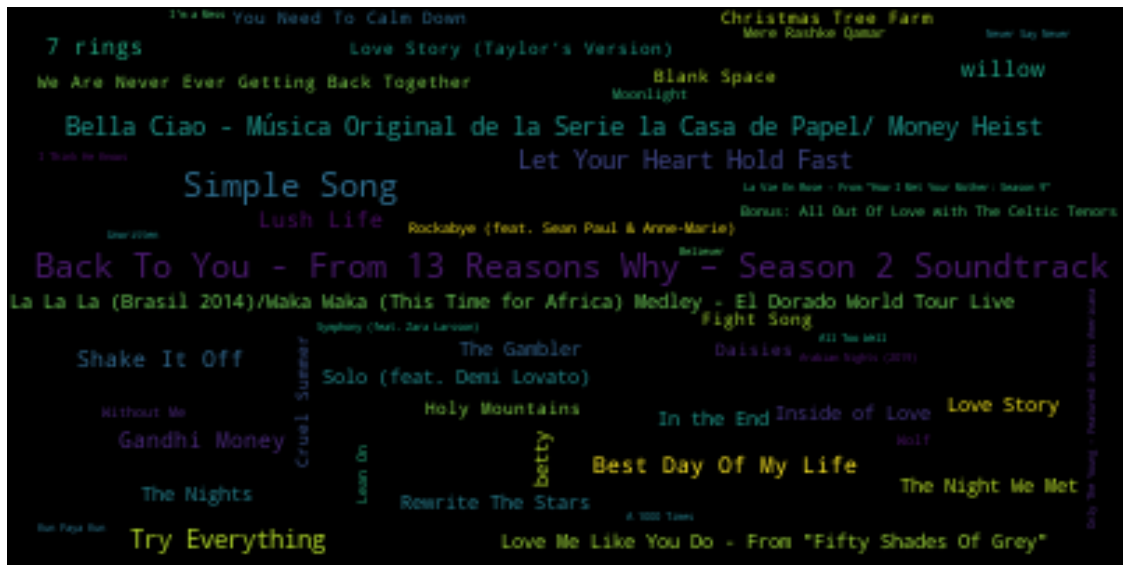

In [47]:
fig, ax = plt.subplots(figsize = (20, 15))

wordcloud = WordCloud(width = 400, height = 200, max_words = 50, relative_scaling = 0.5, normalize_plurals = False).generate_from_frequencies(fav_songs)
ax.imshow(wordcloud, interpolation = 'bilinear')
plt.axis(False);

#### 10. What is my favorite Taylor Swift song?

In [62]:
taylor_swift_df = df[df['artistName'] == 'Taylor Swift']

In [63]:
top_ts_songs = taylor_swift_df.groupby(['trackName'])[['Listening Time(Hours)','Listening Time(Minutes)','Count']].sum().sort_values(by='Count',ascending=False)
top_ts_songs.head()

,Listening Time(Hours),Listening Time(Minutes),Count
trackName,,,
willow,0.418,25.167,9
Shake It Off,0.068,4.100,9
betty,0.541,32.383,8
Love Story,0.067,4.017,7
We Are Never Ever Getting Back Together,0.107,6.434,6


In [65]:
top_ts_songs.to_csv('taytay.csv')

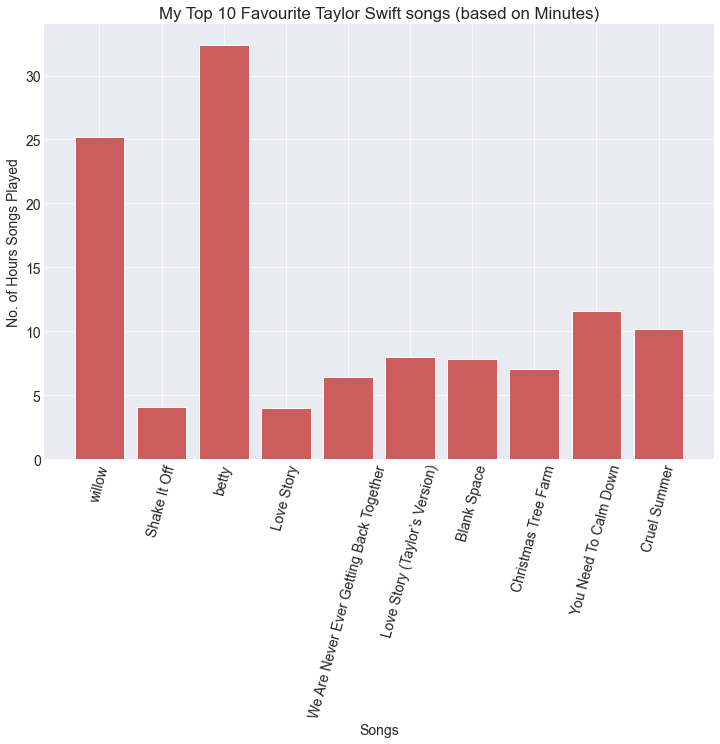

In [60]:
fig, ax = plt.subplots(figsize = (12,8))

ax.bar(top_ts_songs.head(10).index, top_ts_songs['Listening Time(Minutes)'].head(10), color = 'indianred')
ax.set(title = 'My Top 10 Favourite Taylor Swift songs (based on Minutes)', xlabel = 'Songs', ylabel = 'No. of Hours Songs Played');
plt.xticks(rotation = 75);